In [3]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
data = pd.read_csv('twitter_data/tweets_processed.csv')
green = pd.read_csv('twitter_data/green_tweets_processed.csv')

c:\Users\TheaK\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Prediction

In [92]:
df = pd.read_csv('test_set.csv')
df = df[:1000]
df = df[['Tweets','gold_label_sustainability','general','New_calc_green']]
df['green'] = df['New_calc_green'] == 'TRUE'
df = df.drop(columns = ['New_calc_green'])
df.reset_index(inplace=True, drop=True)
for column in ['gold_label_sustainability', 'green', 'general']:
    df[column] = df[column].apply(lambda x: 1 if x == True else 0 )
df

,Tweets,gold_label_sustainability,general,green
0,RT @SustainBrands: WEBINAR: Gain insights into...,1,1,1
1,RT @AmChemistry: ACC's Steve Russell speaks wi...,1,1,1
2,Reliably integrate renewable energy sources in...,1,1,1
3,"Ja, es gibt sie wirklich, die Deutsche Schneep...",0,0,0
4,Looks like it might be time to get our groove ...,0,0,0
...,...,...,...,...
995,Ready or not – Digital transformation is comin...,0,0,0
996,Digital twins are the user interfaces of the f...,0,0,0
997,"At our lastest tech for-event, @ShashankSamala...",1,1,1
998,.@DHLexpress is investing in e-cargo planes bu...,1,0,1


In [93]:
df_2 = pd.read_csv('test_set_2.csv')
df_2 = df_2[:311]
df_2 = df_2[['Tweets','gold_label_sustainability','general','green']]
df_2.reset_index(inplace=True, drop=True)
for column in ['gold_label_sustainability', 'green', 'general']:
    df_2[column] = df_2[column].apply(lambda x: 1 if x == True else 0 )
df_2

,Tweets,gold_label_sustainability,general,green
0,Heute schon en:formiert? Neu im #enformerblog:...,1,1,1
1,"Walter Leitner, professor at the @RWTH Aachen ...",1,1,1
2,Greece’s 🇬🇷 #decarbonization journey is not an...,1,1,1
3,#DeutschePostDHL mit umweltfreundlichem Versan...,1,1,1
4,Exploring the role of transport in a world bel...,1,1,1
...,...,...,...,...
306,#Greece: rapprochement in the debate over debt...,0,0,1
307,“More is better” is a relic of the past – we a...,1,1,1
308,And... 𝗜𝗧's 𝗔👌🏻1st flight for @ITAAirways' #A3...,1,0,1
309,"As part of HRH The Prince of Wales’ @TheSMI, t...",1,1,1


In [94]:
merged_test = pd.concat([df, df_2])
merged_test.reset_index(inplace=True, drop=True)
merged_test

,Tweets,gold_label_sustainability,general,green
0,RT @SustainBrands: WEBINAR: Gain insights into...,1,1,1
1,RT @AmChemistry: ACC's Steve Russell speaks wi...,1,1,1
2,Reliably integrate renewable energy sources in...,1,1,1
3,"Ja, es gibt sie wirklich, die Deutsche Schneep...",0,0,0
4,Looks like it might be time to get our groove ...,0,0,0
...,...,...,...,...
1306,#Greece: rapprochement in the debate over debt...,0,0,1
1307,“More is better” is a relic of the past – we a...,1,1,1
1308,And... 𝗜𝗧's 𝗔👌🏻1st flight for @ITAAirways' #A3...,1,0,1
1309,"As part of HRH The Prince of Wales’ @TheSMI, t...",1,1,1


In [95]:
general_df = merged_test[merged_test['gold_label_sustainability']==1]
general_df

,Tweets,gold_label_sustainability,general,green
0,RT @SustainBrands: WEBINAR: Gain insights into...,1,1,1
1,RT @AmChemistry: ACC's Steve Russell speaks wi...,1,1,1
2,Reliably integrate renewable energy sources in...,1,1,1
5,RT @Siemens_Aus: Did you know that Siemens is ...,1,1,1
9,RT @PghBizTimes: .@CovestroGroup and @penguins...,1,1,1
...,...,...,...,...
1305,RT @SiemensII #Solar panels &amp; #Siemens mi...,1,0,1
1307,“More is better” is a relic of the past – we a...,1,1,1
1308,And... 𝗜𝗧's 𝗔👌🏻1st flight for @ITAAirways' #A3...,1,0,1
1309,"As part of HRH The Prince of Wales’ @TheSMI, t...",1,1,1


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", round(100* accuracy_score(df['gold_label_sustainability'], df['green']),2),"%")
print("Precision:", round(100* precision_score(df['gold_label_sustainability'], df['green']),2),"%")
print("Recall:", round(100* recall_score(df['gold_label_sustainability'], df['green']),2),"%")
print("F1-Score:", round(100* f1_score(df['gold_label_sustainability'], df['green']),2),"%")

Accuracy: 92.2 %
Precision: 79.24 %
Recall: 92.71 %
F1-Score: 85.45 %


In [97]:
df = merged_test

In [98]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from string import punctuation

df['Tweets'] = [entry.lower() for entry in df['Tweets']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['Tweets']= [word_tokenize(entry) for entry in df['Tweets']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['Tweets']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and not any(p in word for p in punctuation):# and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)

In [99]:
from sklearn. model_selection import train_test_split 
from sklearn.utils import resample,shuffle

#greens = df[df['gold_label_sustainability']==True]
#spam_upsample = resample(greens,
             #replace=True,
             #n_samples=856,
             #random_state=42)
#df_upsampled = pd.concat([df[df['gold_label_sustainability']==False], spam_upsample])
#Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_upsampled['text_final'],df_upsampled['gold_label_sustainability'],
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text_final'],df['general'],
stratify=df['general'], 
test_size=0.3)



In [100]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

Naive Bayes Accuracy Score ->  71.57360406091371
Naive Bayes Recall Score ->  3.4782608695652173
Naive Bayes Precision Score ->  80.0
Naive Bayes F1 Score ->  6.666666666666667


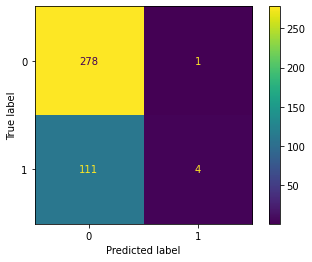

In [101]:
# fit the training dataset on the NB classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Naive = naive_bayes.MultinomialNB(
    #class_prior = [0.3,0.7]
    )
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(Test_Y, predictions_NB)*100)
print("Naive Bayes Recall Score -> ",recall_score(Test_Y, predictions_NB)*100)
print("Naive Bayes Precision Score -> ",precision_score(Test_Y, predictions_NB)*100)
print("Naive Bayes F1 Score -> ",f1_score(Test_Y, predictions_NB)*100)
cm = confusion_matrix(Test_Y, predictions_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

SVM Accuracy Score ->  80.20304568527918
SVM Recall Score ->  40.0
SVM Precision Score ->  83.63636363636363
SVM F1 Score ->  54.11764705882353


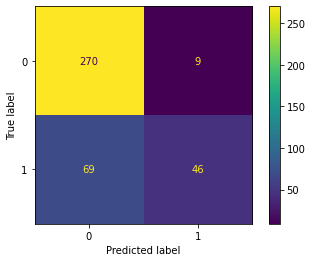

In [102]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(Test_Y, predictions_SVM)*100)
print("SVM Recall Score -> ",recall_score(Test_Y, predictions_SVM)*100)
print("SVM Precision Score -> ",precision_score(Test_Y, predictions_SVM)*100)
print("SVM F1 Score -> ",f1_score(Test_Y, predictions_SVM)*100)
cm = confusion_matrix(Test_Y, predictions_SVM,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

SVM Accuracy Score ->  79.44162436548223
SVM Recall Score ->  56.52173913043478
SVM Precision Score ->  67.70833333333334
SVM F1 Score ->  61.61137440758294


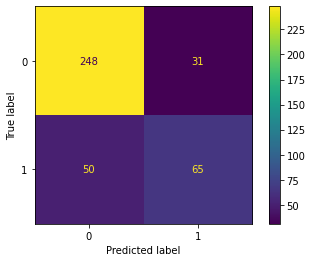

In [103]:
from sklearn import tree

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
clf = tree.DecisionTreeClassifier()
clf.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = clf.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(Test_Y, predictions_SVM)*100)
print("SVM Recall Score -> ",recall_score(Test_Y, predictions_SVM)*100)
print("SVM Precision Score -> ",precision_score(Test_Y, predictions_SVM)*100)
print("SVM F1 Score -> ",f1_score(Test_Y, predictions_SVM)*100)
cm = confusion_matrix(Test_Y, predictions_SVM,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [104]:
dfr = pd.DataFrame(Test_X)
dfr = dfr.reset_index(level=0)
dfr['predictions_svm'] = pd.DataFrame(predictions_SVM)
dfr['correct'] = pd.DataFrame(Test_Y)
dfr.to_csv('predictions0802.csv', header=True, index=False, columns=list(dfr.axes[1]))


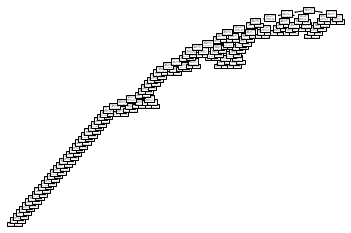

In [105]:
from sklearn import tree
tree.plot_tree(clf)
plt.savefig('out_2.pdf') 